In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("C:/Users/admin/Desktop/JuliaDQMC/code/")
from DP_Lib import *
from Plt_Lib import *

In [2]:
# 配置参数
folder_paths = "./"

# 主程序
U,Data=File_Process(folder_paths)
skip=5

SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ0.3N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ0.6N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ0.9N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ1.2N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ1.5N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ1.8N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ2.1N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ2.4N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ2.7N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ3.0N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ3.3N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ3.6N15BS10.csv
SCEEicrHC_t1.0U3.8size[12, 12]Δt0.1Θ3.9N15BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ0.3N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ0.6N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ0.9N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ1.2N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ1.5N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δt0.1Θ1.8N21BS10.csv
SCEEicrHC_t1.0U3.8size[15, 15]Δ

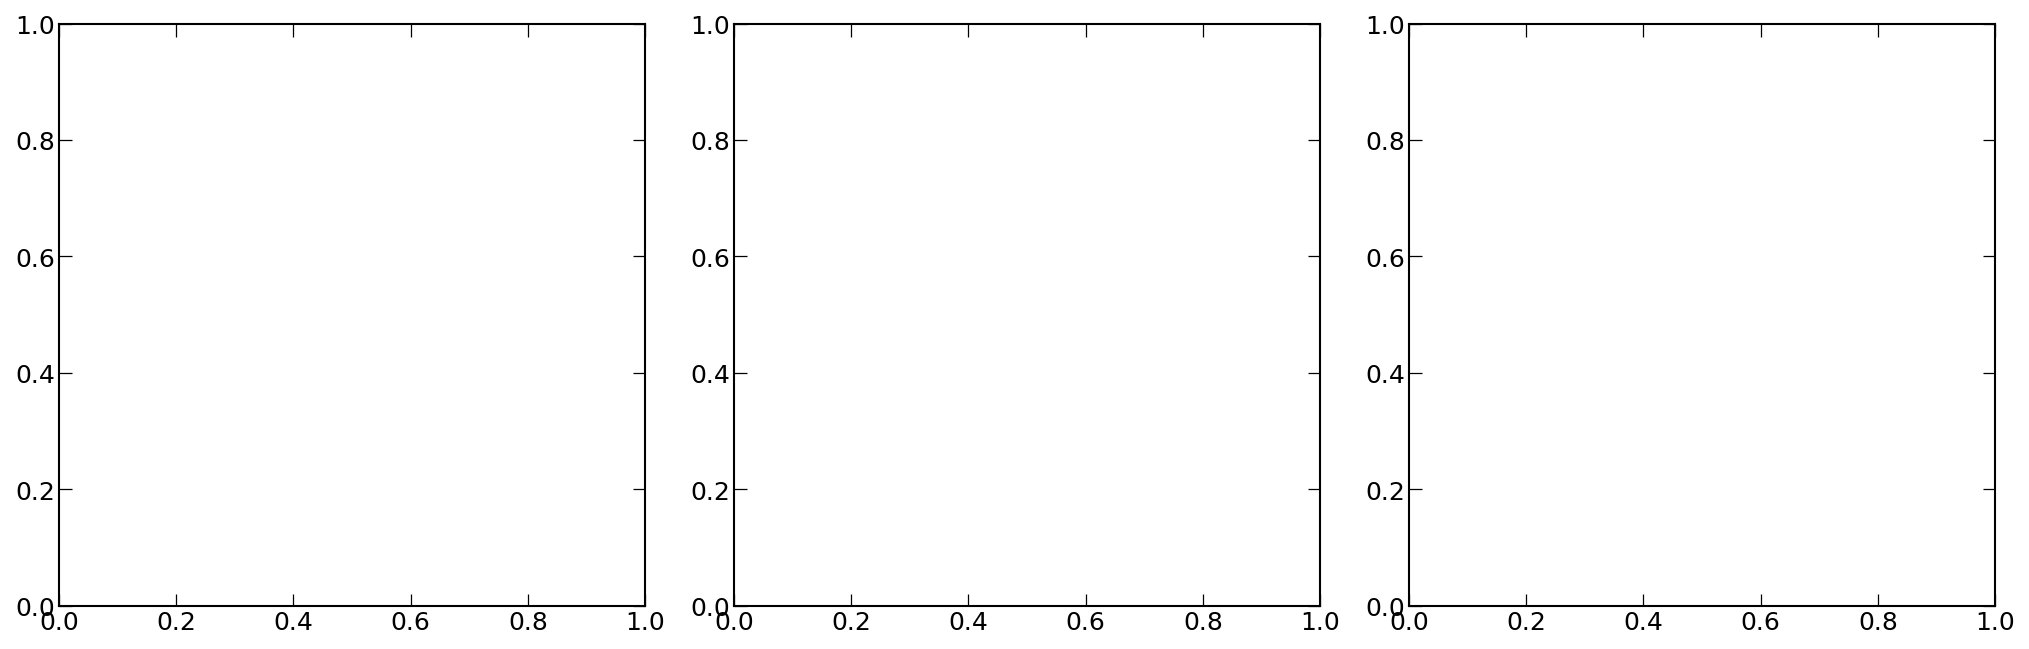

In [3]:
fig,ax=create_plot(1,3,col=2)
plt.rcParams.update({
    "legend.fancybox": False,
    "legend.frameon": False,
    "legend.framealpha":0.5,
    "legend.edgecolor": "black",
    })
t=Data['t'].values.astype(float)
L=Data["L"].values.astype(int)
EE=Data["EE"].values.astype(float)
dEE=Data["dEE"].values.astype(float)
Lu=np.unique(L)
tlist=np.unique(Data.t.values)
xticks=tlist

In [4]:
Avg=[]
dAvg=[]
# figTheta=plt.figure(figsize=(8,6))
count=0
for i, Θ in enumerate(tlist):
    idx = Data['t'] == Θ
    x = Data.loc[idx, 'L'].values
    y = Data.loc[idx, 'EE'].values
    dy = Data.loc[idx, 'dEE'].values

    # 找到最近邻数据点
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    dy = dy[sorted_indices]

    data=[(x[i],y[i],dy[i]) for i in range(len(x))]

    idx=unit_neardata(data)
    avg = np.mean(y[idx])
    Avg.append(avg)
    dAvg.append(np.mean(dy[idx]))


    if i%3==1:
        count+=1
        plot_data(ax[0], x, y, yerr=dy, marker=markers[count%len(markers)], color=colors[count%len(colors)], label=rf'$\tau$={Θ}')
    # ax[0].errorbar(x, y, yerr=dy,
    #     capsize=errorbar_capsize, ecolor='black', markerfacecolor='none',
    #     marker=markers[i%len(markers)], color=colors[i%len(colors)], fmt='-', label=f'$\Theta$={Θ}')

    # plt.axhline(avg, color="black", linestyle='--',linewidth=0.2)
    # plt.text(2, avg, f'{avg:.2f}', ha='center', va='bottom')

    # for i in idx:
    #     plt.text(x[i], y[i], "[  ]", color='blue',ha='center',va='center',fontsize=10)

ax[0].legend(bbox_to_anchor=(0.01, 0.9), loc='upper left', handletextpad=0.3,borderaxespad=0.,fontsize=8)
# plt.legend(loc='right')
ax[0].set_xlabel(r'$L$')
ax[0].set_ylabel(r'$\Delta S_2$')
ax[0].set_xticks([3,6,9,12,15,18])
ax[0].set_xlim(-2,max(L)+1)



(-2.0, 19.0)

In [5]:
ax[1].set_xscale("log")
ax[1].set_xlabel("")
ax[1].set_ylabel(r"$\Delta S_2$")

# 遍历处理每个L值
for l in Lu:
    # 获取当前L值的索引
    idx = np.where(np.array(L) == l)[0]

    if len(idx) > 0:
        # 提取数据并排序
        x = (t[idx])  # 原代码对t取对数
        y = EE[idx]
        dy = dEE[idx]
        
        sorted_indices = np.argsort(x)
        x_sorted = x[sorted_indices]
        y_sorted = y[sorted_indices]
        dy_sorted = dy[sorted_indices]
        
        i=np.where(Lu==l)[0][0]
        plot_data(ax[1], x_sorted, y_sorted, yerr=dy_sorted, marker=markers[i%len(markers)], color=colors[i%len(colors)], label=f'$L$={l}')
        # ax[1].errorbar(x_sorted, y_sorted, yerr=dy_sorted,
            # capsize=errorbar_capsize, markersize=10,ecolor='black', markerfacecolor='none',
            # marker=markers[i%len(markers)], color=colors[i%len(colors)], fmt='--', label=f"L={int(l)}")
Avg=np.array(Avg)
dAvg=np.array(dAvg)
para,ds=linear_fit(np.log(tlist[skip:]),Avg[skip:],dAvg[skip:])
x=np.linspace(tlist[skip-1],tlist[-1],100)
y=para[0]*np.log(x)+para[1]
ax[1].plot(x, y,linewidth=3,alpha=0.5,color='red',zorder=10 , label=rf'Fit: $s_c\ln \tau +c$')
print(f'$ y= ( {para[0]:.3f}\pm {ds:.3f} ) \ln \\tau + {para[1]:.3f}$')
s=para[0]
const=para[1]
# 调整图例位置（右上角）
ax[1].legend(bbox_to_anchor=(0.05, 0.9), loc='upper left', borderaxespad=0.)
# 绘制基准线
# ax[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
ax[1].set_xticks([0.3,0.6,1.2,1.8,2.4,3.0,3.9])
ax[1].set_xticklabels([ '0.3', '0.6', '1.2', '1.8', '2.4', '3.0', '3.9'])
ax[1].set_xlabel(r"$ \tau$ ")


$ y= ( 0.346\pm 0.020 ) \ln \tau + 0.038$


Text(0.5, 10.833333333333332, '$ \\tau$ ')

In [6]:
for l in Lu:
    if l==3 or l==6:
        continue
    # 获取当前L值的索引
    idx = np.where(np.array(L) == l)[0]

    if len(idx) > 0:
        # 提取数据并排序
        x = t[idx]/L[idx]  # 原代码对t取对数
        y = EE[idx]-s*np.log(L[idx])
        dy = dEE[idx]
        
        sorted_indices = np.argsort(x)
        x_sorted = x[sorted_indices]
        y_sorted = y[sorted_indices]
        dy_sorted = dy[sorted_indices]
        
        idx=np.where(x_sorted > 0.05)[0]
        x_sorted = x_sorted[idx]
        y_sorted = y_sorted[idx]
        dy_sorted = dy_sorted[idx]

        # 绘制带误差条的曲线    
        i=np.where(Lu==l)[0][0]
        # 去除 fmt 中的 marker 仅保留线型
        plot_data(ax[2], x_sorted, y_sorted, yerr=dy_sorted, marker=markers[i%len(markers)], color=colors[i%len(colors)], label=rf'$L$={int(l)}')

xx=np.linspace(0.15,0.4,100)
yy=s*np.log(xx)+const-0.1
ax[2].plot(xx,yy,"--",linewidth=1,alpha=0.5,color='red',zorder=0 ,
        label="")
# r"Fit: $s_c \ln \frac{\tau}{L} + c$"
print(rf'$ y= ({s:.3f}\pm{ds:.3f}) \ln x + {const:.3f} $')

# 调整图例位置（右上角）
ax[2].legend(bbox_to_anchor=(0.05, 0.9), loc='upper left', borderaxespad=0.)
# 绘制基准线
ax[2].set_xscale("log")
# plt.xticks(tllist)
ax[2].set_xlabel(r"$\tau/L$ ")
ax[2].set_ylabel(r"$\Delta S_2-s_c\ln L$")

tllist=np.round(np.arange(np.min(t/L),np.max(t/L),0.1),1).tolist()
tllist=[0.05,0.15,0.3,0.5]
ax[2].set_xticks(tllist)
ax[2].set_xticklabels(tllist)
ax[2].set_xlim(0.05,0.5)
ax[2].set_ylim(-0.9,-0.2)



# x_min, x_max = ax.get_xlim()
# y_min, y_max = ax.get_ylim()
# plt.text(x_min+0.4*(x_max-x_min), y_min+0.08*(y_max-y_min),  r'$s \approx$' + f'{s:.3f}$\pm${ds:.3f}', ha='center',fontsize=18, va='bottom',bbox=dict(
#             facecolor=colors[1],   # 背景颜色
#             alpha=0.1,           # 透明度
#             edgecolor='none',   # 边框颜色
#             boxstyle='round,pad=0.5'  # 圆角和边距
#         ))

$ y= (0.346\pm0.020) \ln x + 0.038 $


(-0.9, -0.2)

C:\Users\admin\AppData\Local\Temp\ipykernel_21224\2359816926.py:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.08)


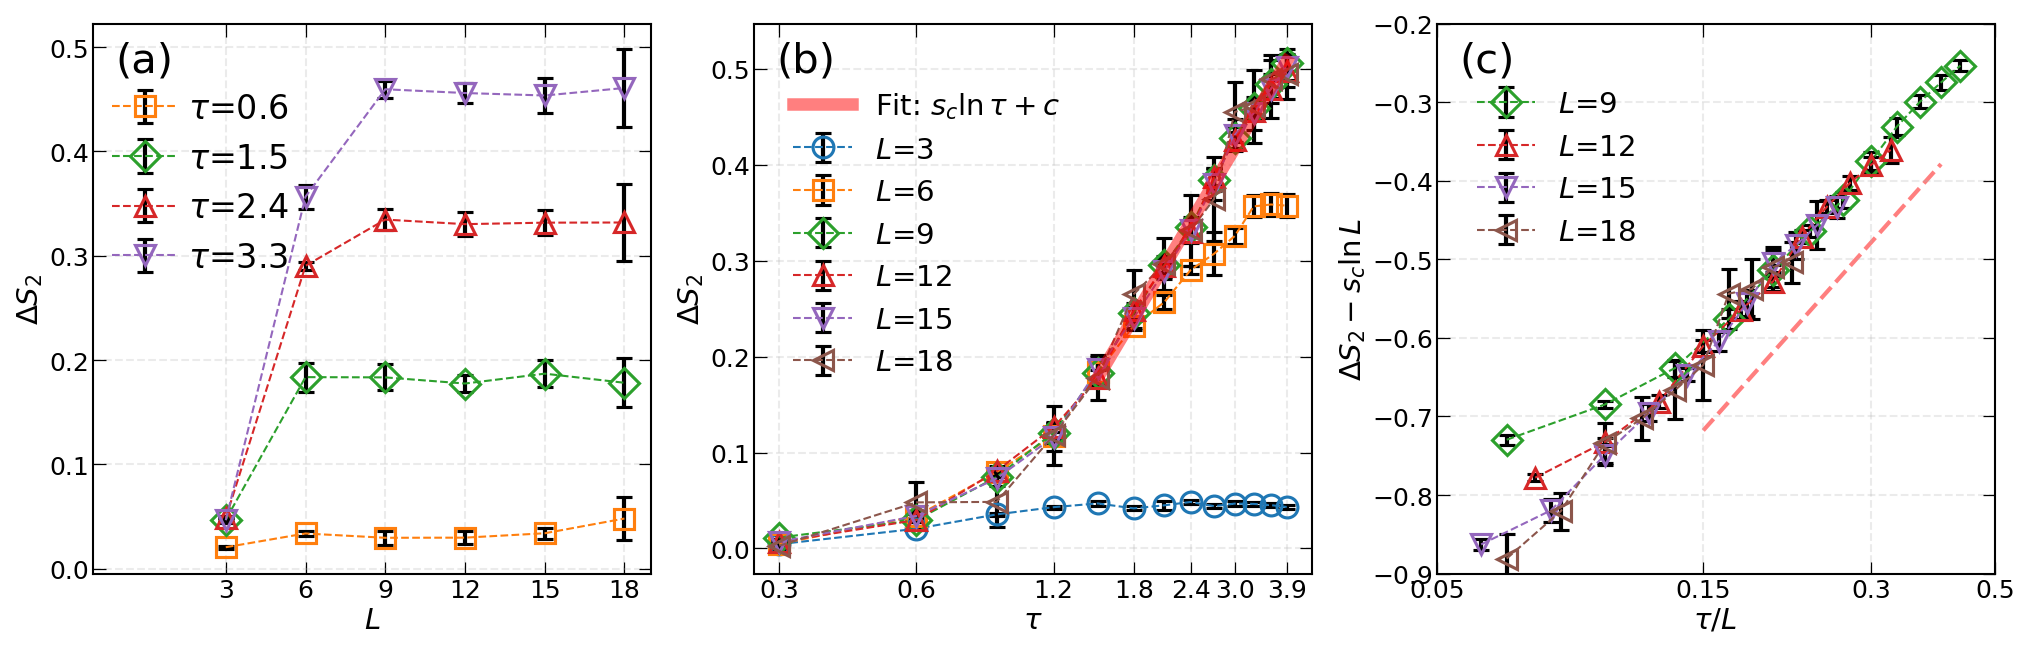

In [7]:
ABCD=["a","b","c","d","e","f","g"]
for idx, subax in enumerate(ax.ravel()):
    subax.grid(True, which='both',linestyle='--', linewidth=0.5, alpha=0.25)
    subax.minorticks_off()
    subax.text(0.04, 0.97, f'({ABCD[idx]})', transform=subax.transAxes, fontsize=10, va='top')
fig.subplots_adjust(bottom=0.08)

fig

In [8]:
fig.savefig("fixTheta.pdf", bbox_inches='tight', pad_inches=0.02)


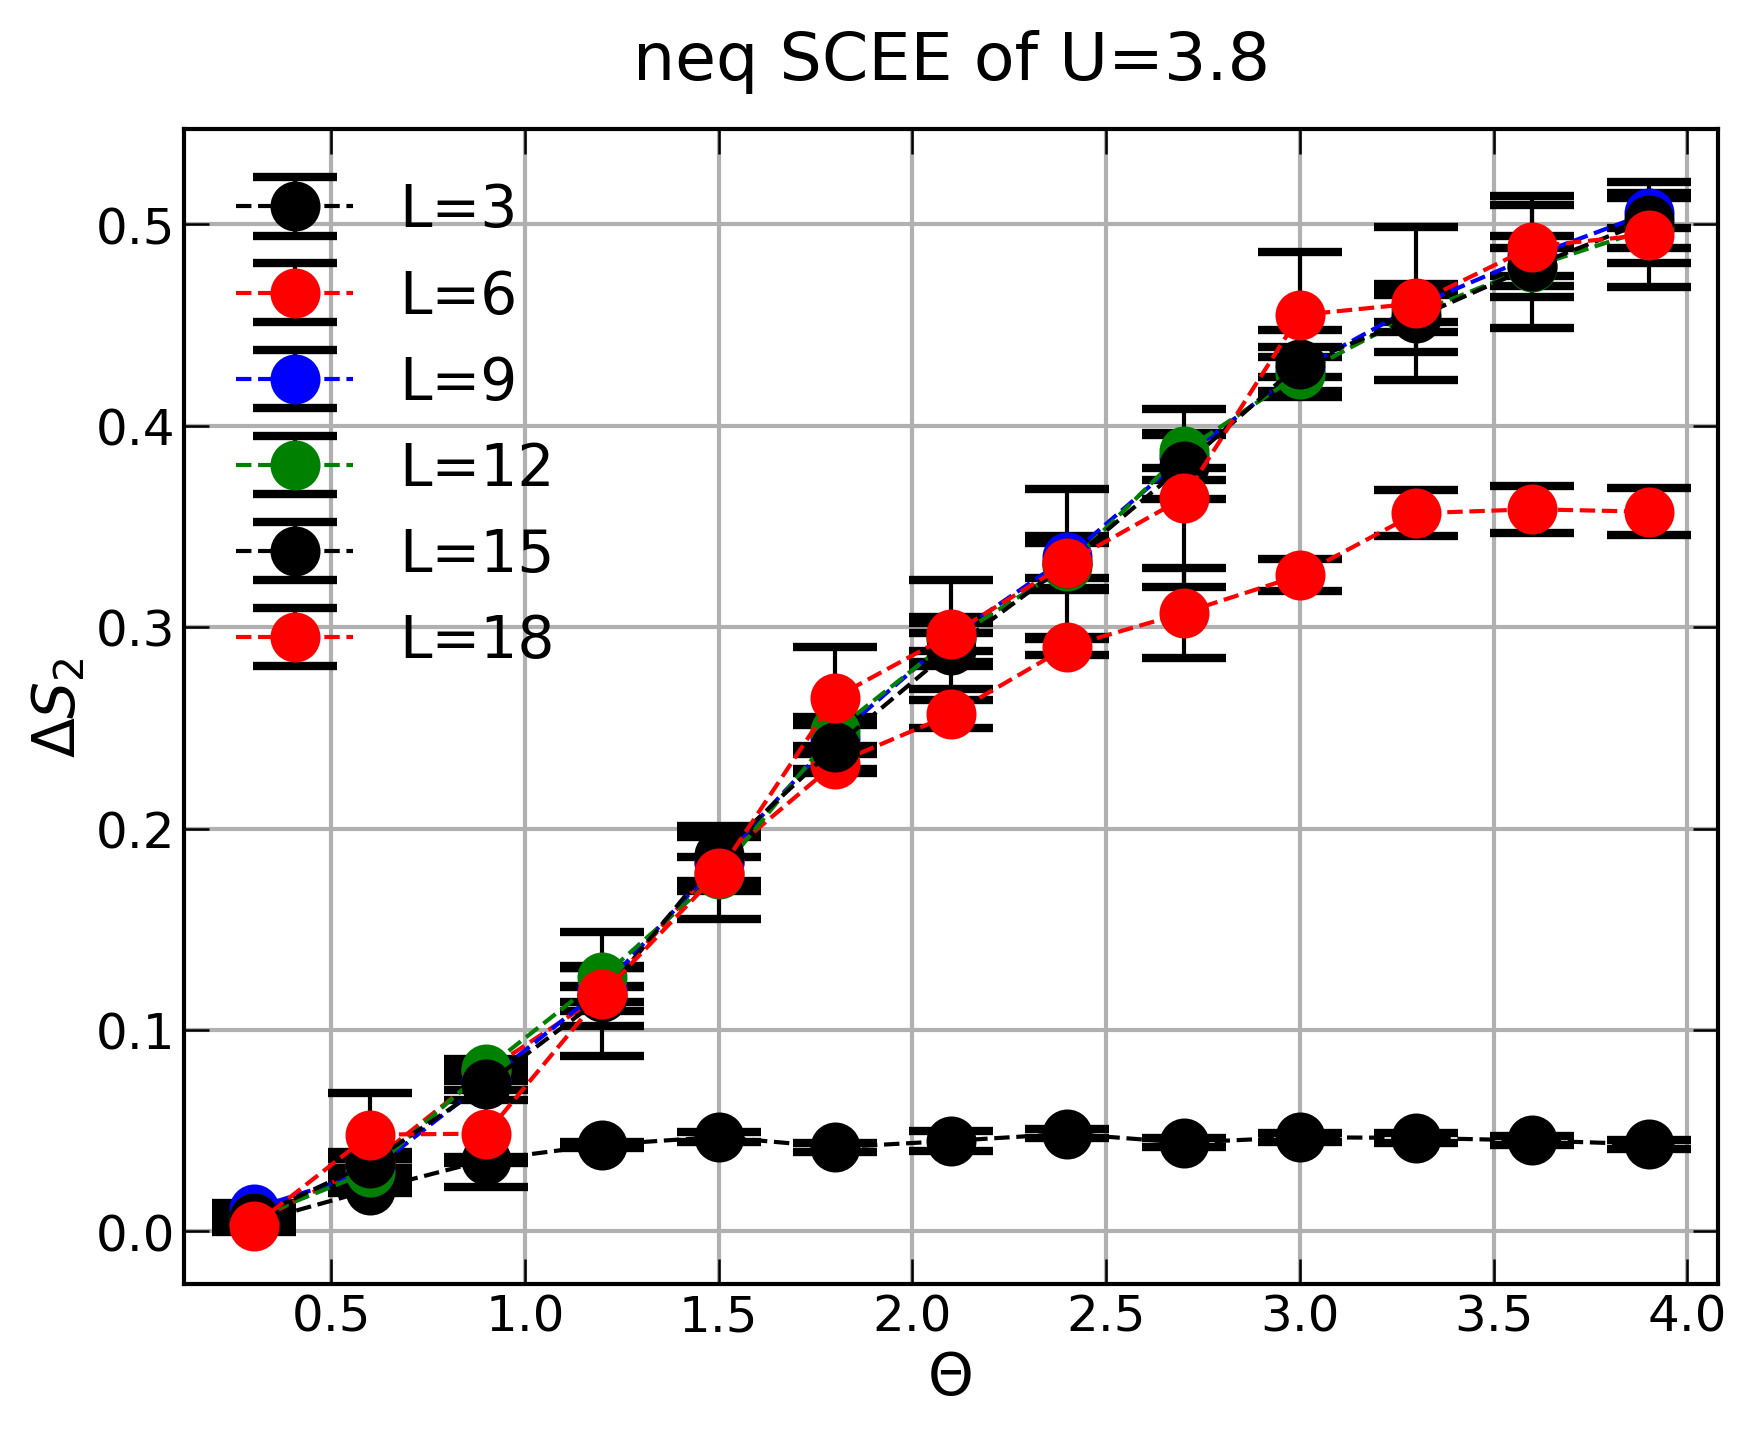

In [9]:
t=Data['t'].values.astype(float)
L=Data["L"].values.astype(int)
EE=Data["EE"].values.astype(float)
dEE=Data["dEE"].values.astype(float)
Lu=np.unique(L)
tlist=np.unique(Data.t.values)
xticks=tlist
for l in np.unique(L):
    idx = np.where(np.array(L) == l)[0]
    if len(idx) > 0:
        x = (t[idx])  # 原代码对t取对数
        y = EE[idx]
        dy = dEE[idx]
        
        sorted_indices = np.argsort(x)
        x_sorted = x[sorted_indices]
        y_sorted = y[sorted_indices]
        dy_sorted = dy[sorted_indices]
        # plt.figure()
        plt.errorbar(x_sorted, y_sorted, yerr=dy_sorted,
                fmt='o--', markersize=5, capsize=5, ecolor='black',label=f"L={int(l)}")
        plt.xlabel(r"$ \Theta$ ")
        plt.ylabel(r"$\Delta S_2$")
        # plt.savefig(os.path.join(folder_paths, f"fixL-{int(l)}.png"))
plt.legend()
plt.title(f"neq SCEE of U={U}")
plt.grid()
plt.show()